## 原始实现

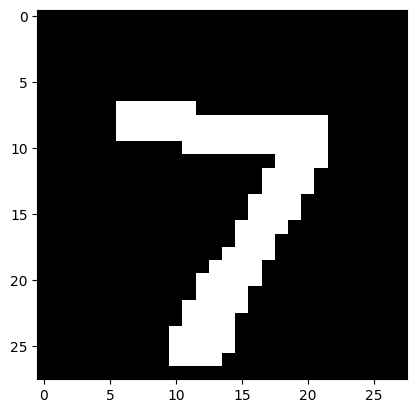

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

# 读取数据
m_x = np.loadtxt('mnist_x', delimiter=' ')
m_y = np.loadtxt('mnist_y')

# 数据可视化
data = np.reshape(np.array(m_x[0], dtype=int), [28, 28])
plt.figure()
plt.imshow(data, cmap='gray')

# 将数据分为训练集和测试集
ratio = 0.8
split = int(len(m_x) * ratio)

# 打乱数据
np.random.seed(0)
idx = np.random.permutation(np.arange(len(m_x)))
m_x = m_x[idx]
m_y = m_y[idx]

In [5]:
x_train, x_test = m_x[:split], m_x[split:]
y_train, y_test = m_y[:split], m_y[split:]

In [6]:
def distance(a, b):
    # 计算欧式距离
    return np.sqrt(np.sum(np.square(a - b)))

In [7]:
class KNN:
    def __init__(self, k, label_num):
        self.k = k
        self.label_num = label_num  # 类别的数量

    def fit(self, x_train, y_train):
        # 保存当前训练数据
        self.x_train = x_train
        self.y_train = y_train

    def get_knn_indices(self, x):
        # 获取距离目标样本点最近的k个样本点的下标
        # 计算一直样本到目标样本的距离
        dis = list(map(lambda a: distance(a, x), self.x_train))
        # 按距离从小到大排序，并得到对应的下标
        knn_indices = np.argsort(dis)
        # 取最近的k个下标
        knn_indices = knn_indices[:self.k]
        return knn_indices

    def get_label(self, x):
        # 对KNN方法的具体实现，观察k个近邻并使用np.argmax获取其中数量最多的类别
        knn_indices = self.get_knn_indices(x)
        # 类别计算
        label_statistic = np.zeros(shape=[self.label_num])
        for index in knn_indices:
            label = int(self.y_train[index])
            label_statistic[label] += 1
        # 返回数量最多的类别
        return np.argmax(label_statistic)

    def predict(self, x_test):
        # 预测样本x_test 的类别
        predicted_test_labels = np.zeros(shape=[len(x_test)], dtype=int)
        for i, x in enumerate(x_test):
            predicted_test_labels[i] = self.get_label(x)
        return predicted_test_labels

In [8]:
for k in range(1, 10):
    knn = KNN(k, label_num=10)
    knn.fit(x_train, y_train)
    predicted_labels = knn.predict(x_test)

    accuracy = np.mean(predicted_labels == y_test)
    print(f'k的取值为{k}, 预测准确率为{accuracy * 100:.1f}%')

k的取值为1, 预测准确率为88.5%
k的取值为2, 预测准确率为88.0%
k的取值为3, 预测准确率为87.5%
k的取值为4, 预测准确率为87.5%
k的取值为5, 预测准确率为88.5%
k的取值为6, 预测准确率为88.5%
k的取值为7, 预测准确率为88.0%
k的取值为8, 预测准确率为87.0%
k的取值为9, 预测准确率为87.0%


## scikit-learn实现

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

In [10]:
data = np.loadtxt('gauss.csv', delimiter=',')
x_train = data[:, :2]
y_train = data[:, 2]
len(x_train)

200

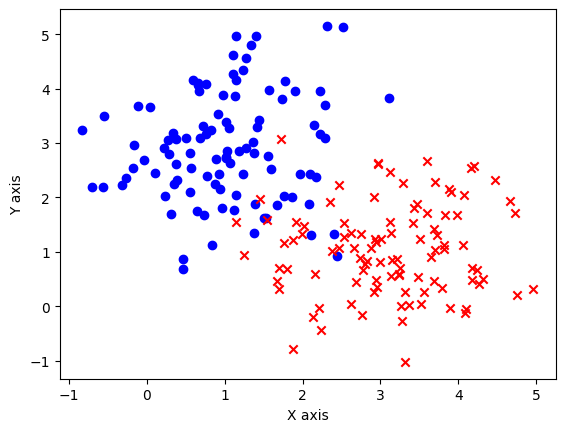

In [11]:
plt.figure()
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [12]:
# 设置步长
step = 0.02
# 设置网格边界
x_min, x_max = np.min(x_train[:, 0]) - 1, np.max(x_train[:, 0]) + 1
y_min, y_max = np.min(x_train[:, 1]) - 1, np.max(x_train[:, 1]) + 1
# 构造网格
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_data = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)

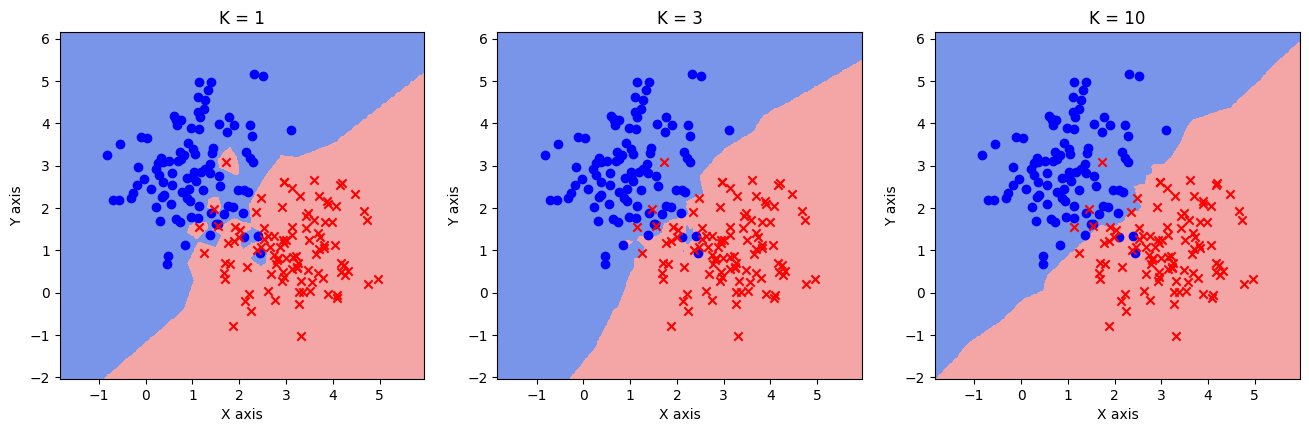

In [13]:
fig = plt.figure(figsize=(16, 4.5))
# k值
ks = [1, 3, 10]
cmap_light = ListedColormap(['royalblue', 'lightcoral'])

for i, k in enumerate(ks):
    # 定义knn分类器
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    z = knn.predict(grid_data)

    # 画出分类结果
    ax = fig.add_subplot(1, 3, i + 1)
    ax.pcolormesh(xx, yy, z.reshape(xx.shape), cmap=cmap_light, alpha=0.7)
    ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
    ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f'K = {k}')

plt.show()

## KNN完成色彩风格迁移

In [14]:
from skimage import io
from skimage.color import rgb2lab, lab2rgb
from sklearn.neighbors import KNeighborsRegressor
import os

In [15]:
path = 'style_transfer'

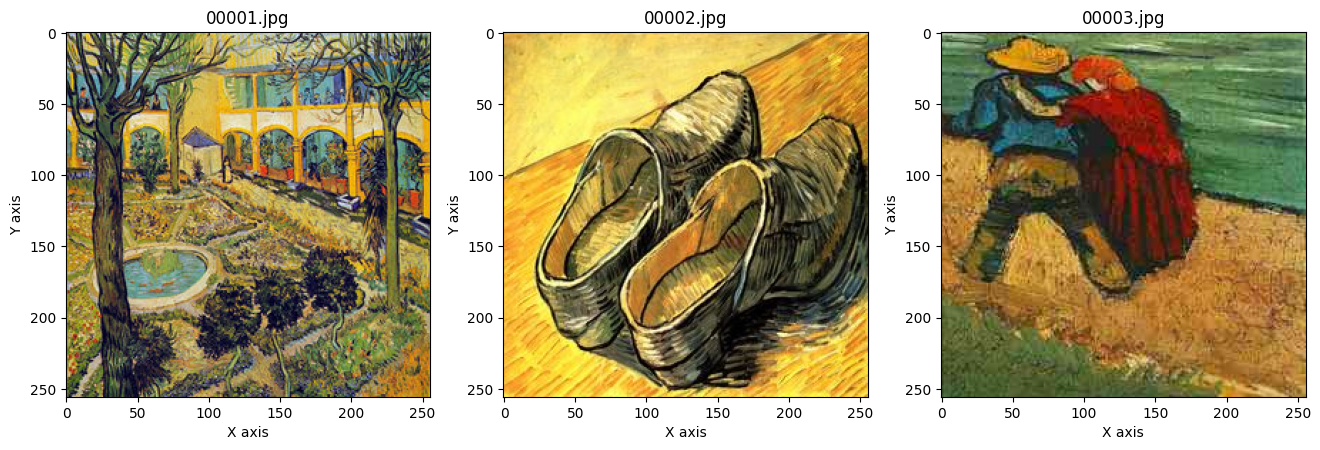

In [16]:
data_dir = os.path.join(path, 'vangogh')
fig = plt.figure(figsize=(16, 5))
for i, file in enumerate(np.sort(os.listdir(data_dir))[:3]):
    img = io.imread(os.path.join(data_dir, file))
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(img)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(file)
plt.show()

In [17]:
# block_size表示向外拓展的层数，扩展1层即为3*3
block_size = 1


def read_style_image(file_name, size=block_size):
    #读入风格图像，得到映射X->Y
    #其中x存储3*3像素格的灰度值，Y存储中心像素格的色彩值
    #读取图像文件，设图像宽为W，高为H，得到W*H*3的RGB矩阵
    img = io.imread(file_name)
    fig = plt.figure()
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

    #将RGB矩阵转换成LAB表示法的矩阵，大小仍然是W*H*3，三维分别是L、A、B
    img = rgb2lab(img)
    #取出图像的宽度和高度
    w, h = img.shape[:2]

    X = []
    Y = []

    #遍历全部可能得中心点
    for x in range(size, w - size):
        for y in range(size, h - size):
            # 保存所有窗口
            X.append(img[x - size:x + size + 1, y - size:y + size + 1, 0].flatten())
            #保存窗口对应的色彩值a和b
            Y.append(img[x, y, 1:])
    return X, Y

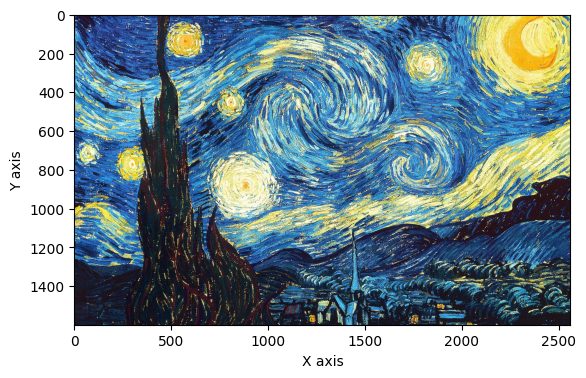

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [18]:
X, Y = read_style_image(os.path.join(path, 'style.jpg'))

# weights='distance' 表示邻居的权重与其到样本的距离成反比
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')
knn.fit(X, Y)

In [19]:
def rebuild(img, size=block_size):
    #打印内容图像
    fig = plt.figure()
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

    #将内容图像转换为LAB表示
    img = rgb2lab(img)
    w, h = img.shape[:2]

    #初始化输出图像对应的矩阵
    photo = np.zeros([w, h, 3])
    #遍历内容图像的中心点，保存所有窗口
    print('Constructing window')
    X = []
    for x in range(size, w - size):
        for y in range(size, h - size):
            window = img[x - size:x + size + 1, y - size:y + size + 1, 0].flatten()
            X.append(window)
    X = np.array(X)

    #使用KNN回归器预测颜色
    print('Predicting')
    pred_ab = knn.predict(X).reshape(w - 2 * size, h - 2 * size, -1)
    #设置输出图像
    photo[:, :, 0] = img[:, :, 0]
    photo[size:w - size, size:h - size, 1:] = pred_ab

    #由于最外面size层无法构造窗口，简单起见，我们把这些像素裁剪掉
    photo = photo[size:w - size, size:h - size, :]
    return photo

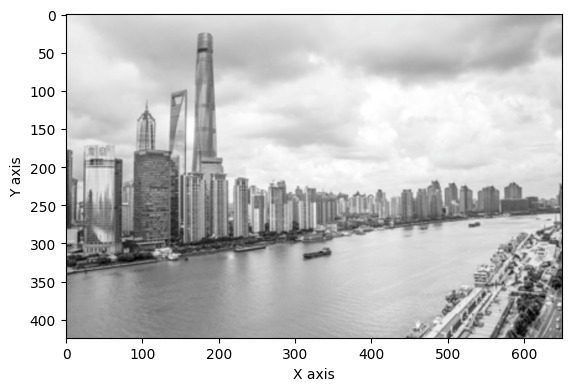

Constructing window
Predicting


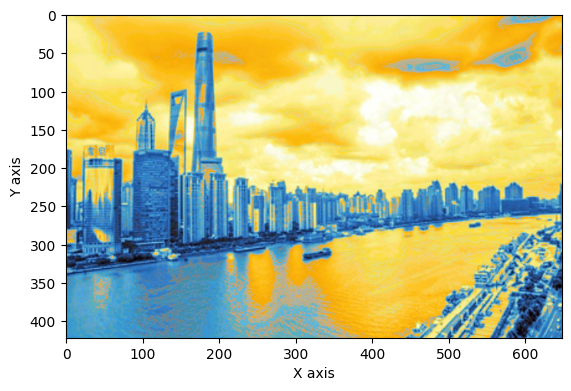

In [20]:
content = io.imread(os.path.join(path, 'input.jpg'))
new_photo = rebuild(content)

#为了展示图像，我们将其转换为RGB表示
new_image = lab2rgb(new_photo)

fig = plt.figure()
plt.imshow(new_image)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()